In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from datetime import date
# tqdm.pandas()
from multiprocessing import Pool
from functools import partial
import Cluster_feature_function as func
import pickle

In [2]:
data = pd.read_csv('D:\\庫存健診開發\\data\\Stock\\TWSE_Stock_fundamental.csv', converters={'ts': str, 'StockNo': str, 'StockName': str})
data['ts'] = pd.to_datetime(data['ts'])
data

,StockName,StockNo,close,high,low,open,return,total,ts,vol,year,total_num,eliminate_period
0,台泥,1101,21.00,21.00,20.40,20.70,0.10,417236030.0,2004-12-20,20105028.0,2004,NaN,0
1,台泥,1101,20.20,20.20,19.70,19.70,0.50,100967115.0,2005-08-12,5037589.0,2005,NaN,0
2,台泥,1101,19.60,20.40,19.50,20.40,-0.80,420293307.0,2005-08-10,21295902.0,2005,NaN,0
3,台泥,1101,20.40,20.40,20.20,20.30,0.10,121245861.0,2005-08-24,5970108.0,2005,NaN,0
4,台泥,1101,20.40,20.55,20.20,20.50,-0.20,147516136.0,2005-08-09,7238224.0,2005,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874551,世紀鋼,9958,11.30,11.80,11.10,11.80,-0.50,1950500.0,2008-07-08,170000.0,2008,NaN,0
2874552,世紀鋼,9958,19.70,19.80,19.40,19.50,0.30,14390595.0,2008-04-15,732635.0,2008,NaN,0
2874553,世紀鋼,9958,19.55,20.00,19.55,20.00,-0.15,18114525.0,2008-04-16,919500.0,2008,NaN,0
2874554,世紀鋼,9958,9.96,10.00,9.60,9.97,-0.01,2673890.0,2008-09-25,270000.0,2008,NaN,0


In [6]:
data_train = data[data['ts'].dt.date < date(2017,9,1)]
data_train = data_train[data_train.total_num.notnull()]
df_list = [group[1] for group in data_train.groupby(data_train['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.get_cluster_feature, decay=0.998), df_list), total=len(df_list)), 1):
            output_list.append(x)
    
data_train = pd.concat(output_list, axis=1).transpose()
data_train.columns = ['total_mean', 'price_ATR', 'capital']
data_train

,total_mean,price_ATR,capital
信大,1.090087e+06,0.012487,4.350600e+09
味王,3.353934e+06,0.013241,5.428082e+09
嘉泥,7.180519e+06,0.017038,9.929070e+09
亞泥,1.305098e+08,0.017656,1.090585e+11
味全,4.412635e+07,0.021098,1.527618e+10
...,...,...,...
新麗,8.960521e+06,0.028727,2.751558e+09
好樂迪,2.022509e+07,0.016900,6.431492e+09
信義,1.305847e+07,0.016879,2.099488e+10
茂順,1.167223e+07,0.018751,6.054425e+09


In [8]:
data_test = data[data['ts'].dt.date >= date(2017,9,1)]
data_test = data_test[data_test.total_num.notnull()]
df_list = [group[1] for group in data_test.groupby(data_test['StockNo'])]

output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.get_cluster_feature, decay=1), df_list), total=len(df_list)), 1):
            output_list.append(x)
    
data_test = pd.concat(output_list, axis=1).transpose()
data_test.columns = ['total_mean', 'price_ATR', 'capital']
data_test

,total_mean,price_ATR,capital
信大,6.225619e+06,0.023681,5.057098e+09
味全,5.082106e+07,0.022709,1.173728e+10
台泥,6.269415e+08,0.018001,1.923319e+11
環泥,5.693180e+06,0.009317,1.370893e+10
亞泥,2.954602e+08,0.020892,1.169718e+11
...,...,...,...
潤泰新,1.053182e+08,0.016481,4.365541e+10
佳龍,1.549676e+07,0.026649,1.487849e+09
新麗,1.498202e+06,0.014931,1.946393e+09
三發地產,1.279441e+07,0.023976,4.201120e+09


In [16]:
display(data_train.max())
display(data_test.max())
display(data_train.min())
display(data_test.min())

total_mean    5.054861e+09
price_ATR     6.198721e-02
capital       3.224980e+12
dtype: float64

total_mean    7.752856e+09
price_ATR     6.686518e-02
capital       6.165044e+12
dtype: float64

total_mean    9.620033e+04
price_ATR     8.632334e-03
capital       1.411654e+08
dtype: float64

total_mean    5.370039e+04
price_ATR     6.048195e-03
capital       5.643811e+07
dtype: float64

In [227]:
big_capital = data_train[data_train['capital'] > data_train.quantile(0.8)['capital']]
middle_capital = data_train[data_train['capital'] > data_train.quantile(0.2)['capital']][data_train['capital'] < data_train.quantile(0.8)['capital']]
small_capital = data_train[data_train['capital'] < data_train.quantile(0.2)['capital']]

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


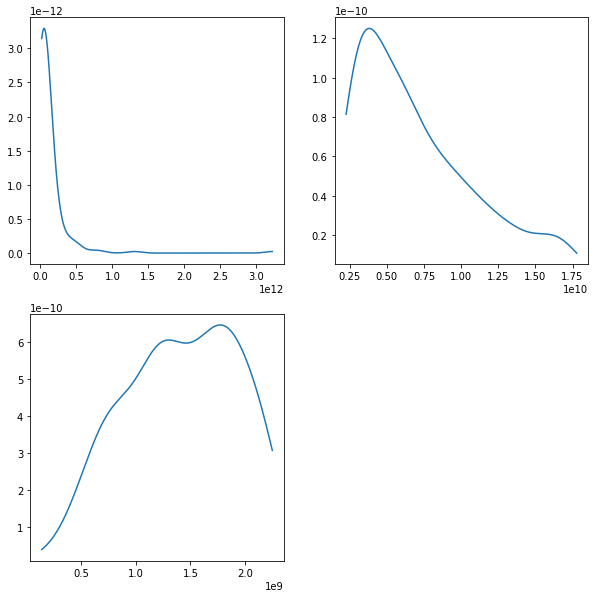

In [237]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
density1 = gaussian_kde(big_capital['capital'])
xs = np.linspace(big_capital['capital'].min(), big_capital['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(middle_capital['capital'])
xs = np.linspace(middle_capital['capital'].min(), middle_capital['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(small_capital['capital'])
xs = np.linspace(small_capital['capital'].min(), small_capital['capital'].max(), 100000)
plt.plot(xs,density1(xs))

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


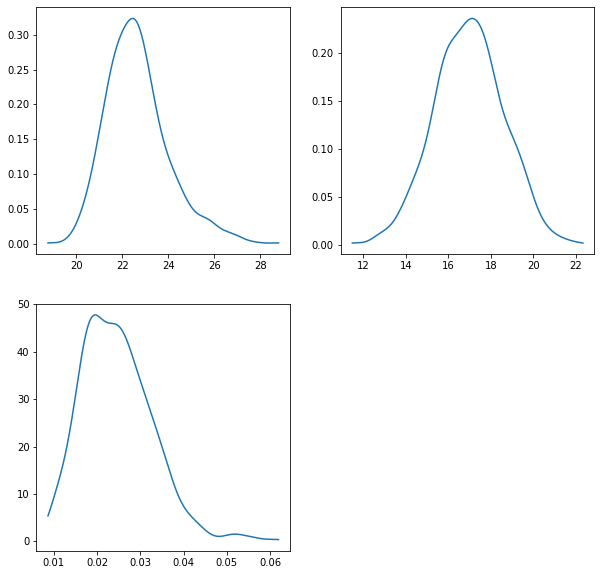

In [238]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(np.log(data_train['capital']))
xs = np.linspace(np.log(data_train['capital']).min(), np.log(data_train['capital']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(np.log(data_train['total_mean']))
xs = np.linspace(np.log(data_train['total_mean']).min(), np.log(data_train['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(data_train['price_ATR'])
xs = np.linspace(data_train['price_ATR'].min(), data_train['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


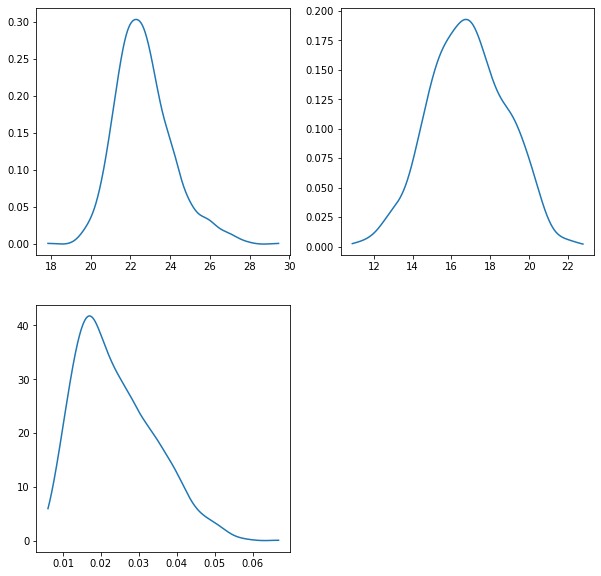

In [240]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(np.log(data_test['capital']))
xs = np.linspace(np.log(data_test['capital']).min(), np.log(data_test['capital']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(np.log(data_test['total_mean']))
xs = np.linspace(np.log(data_test['total_mean']).min(), np.log(data_test['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(data_test['price_ATR'])
xs = np.linspace(data_test['price_ATR'].min(), data_test['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

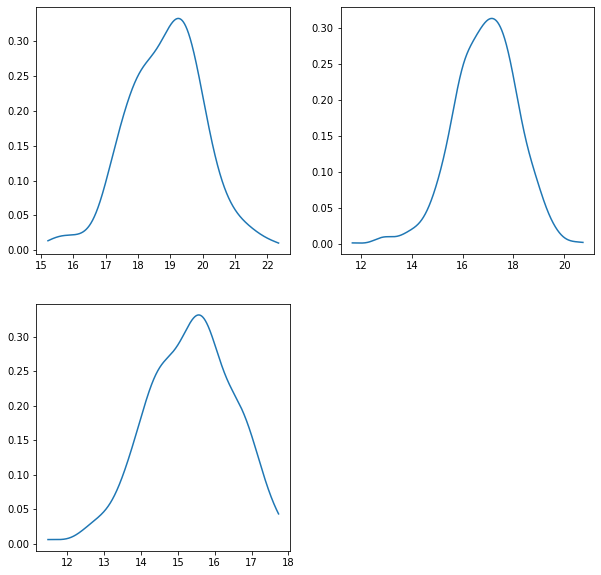

In [232]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
density1 = gaussian_kde(np.log(big_capital['total_mean']))
xs = np.linspace(np.log(big_capital['total_mean']).min(), np.log(big_capital['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(np.log(middle_capital['total_mean']))
xs = np.linspace(np.log(middle_capital['total_mean']).min(), np.log(middle_capital['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(np.log(small_capital['total_mean']))
xs = np.linspace(np.log(small_capital['total_mean']).min(), np.log(small_capital['total_mean']).max(), 100000)
plt.plot(xs,density1(xs))

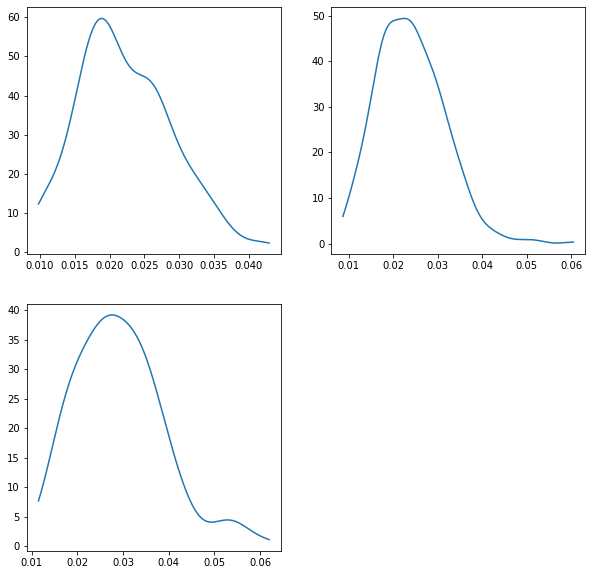

In [230]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
density1 = gaussian_kde(big_capital['price_ATR'])
xs = np.linspace(big_capital['price_ATR'].min(), big_capital['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(middle_capital['price_ATR'])
xs = np.linspace(middle_capital['price_ATR'].min(), middle_capital['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(small_capital['price_ATR'])
xs = np.linspace(small_capital['price_ATR'].min(), small_capital['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

In [244]:
d1_train = pd.concat([np.log(data_train[['total_mean', 'capital']]), data_train['price_ATR']], axis=1)
d1_test = pd.concat([np.log(data_test[['total_mean', 'capital']]), data_test['price_ATR']], axis=1)

In [245]:
df_train = func.Normalize(d1_train, scaler='standardize')
df_test = func.Normalize(d1_test, scaler='standardize')
display(df_train)
display(df_test)

,total_mean,capital,price_ATR
信大,-1.863729,-0.337570,-1.472302
味王,-1.182253,-0.176056,-1.380906
嘉泥,-0.720668,0.264736,-0.920677
亞泥,1.037828,2.013960,-0.845663
味全,0.380295,0.579211,-0.428428
...,...,...,...
新麗,-0.586385,-0.671986,0.496368
好樂迪,-0.092748,-0.052244,-0.937302
信義,-0.358023,0.811318,-0.939939
茂順,-0.426072,-0.096345,-0.713025


,total_mean,capital,price_ATR
信大,-0.607225,-0.236077,-0.021399
味全,0.456717,0.346803,-0.115725
台泥,1.729888,2.282714,-0.572281
環泥,-0.652529,0.454297,-1.414554
亞泥,1.348668,1.938453,-0.291938
...,...,...,...
潤泰新,0.825956,1.256144,-0.719755
佳龍,-0.145112,-1.083047,0.266463
新麗,-1.329010,-0.897070,-0.870034
三發地產,-0.242212,-0.364453,0.007246


In [247]:
display(df_train.corr())
display(df_test.corr())

,total_mean,capital,price_ATR
total_mean,1.000000,0.784344,0.103313
capital,0.784344,1.000000,-0.269928
price_ATR,0.103313,-0.269928,1.000000


,total_mean,capital,price_ATR
total_mean,1.000000,0.754113,0.359813
capital,0.754113,1.000000,-0.126300
price_ATR,0.359813,-0.126300,1.000000


C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


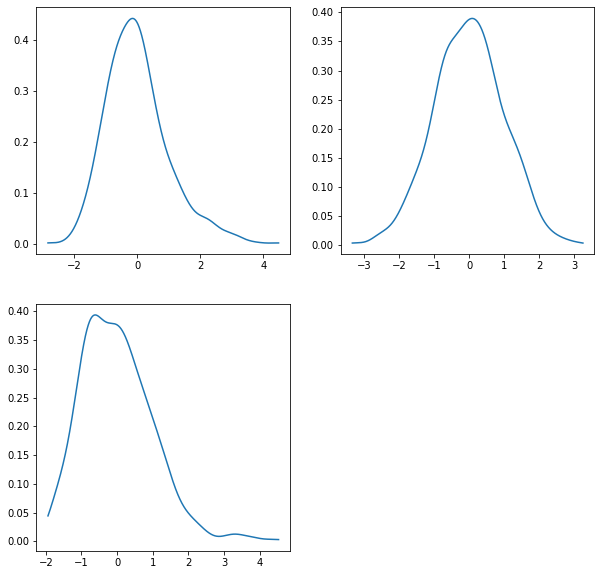

In [248]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(df_train['capital'])
xs = np.linspace(df_train['capital'].min(), df_train['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(df_train['total_mean'])
xs = np.linspace(df_train['total_mean'].min(), df_train['total_mean'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(df_train['price_ATR'])
xs = np.linspace(df_train['price_ATR'].min(), df_train['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


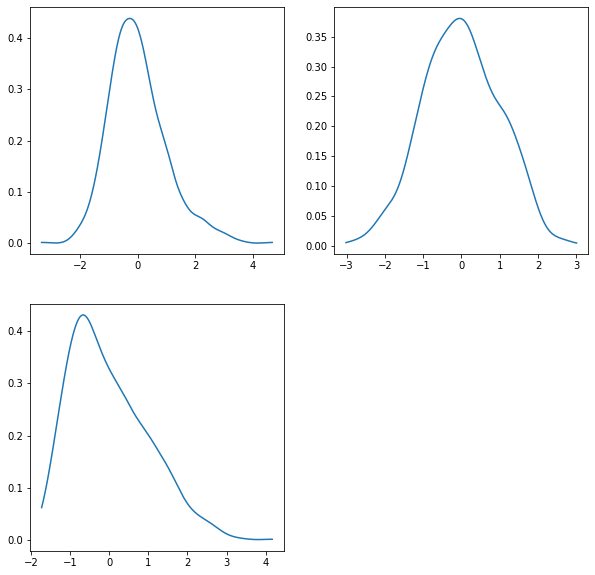

In [249]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.subplot(2,2,1)
density1 = gaussian_kde(df_test['capital'])
xs = np.linspace(df_test['capital'].min(), df_test['capital'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,2)
density1 = gaussian_kde(df_test['total_mean'])
xs = np.linspace(df_test['total_mean'].min(), df_test['total_mean'].max(), 100000)
plt.plot(xs,density1(xs))
plt.subplot(2,2,3)
density1 = gaussian_kde(df_test['price_ATR'])
xs = np.linspace(df_test['price_ATR'].min(), df_test['price_ATR'].max(), 100000)
plt.plot(xs,density1(xs))

Text(0.5, 0, 'Capital')

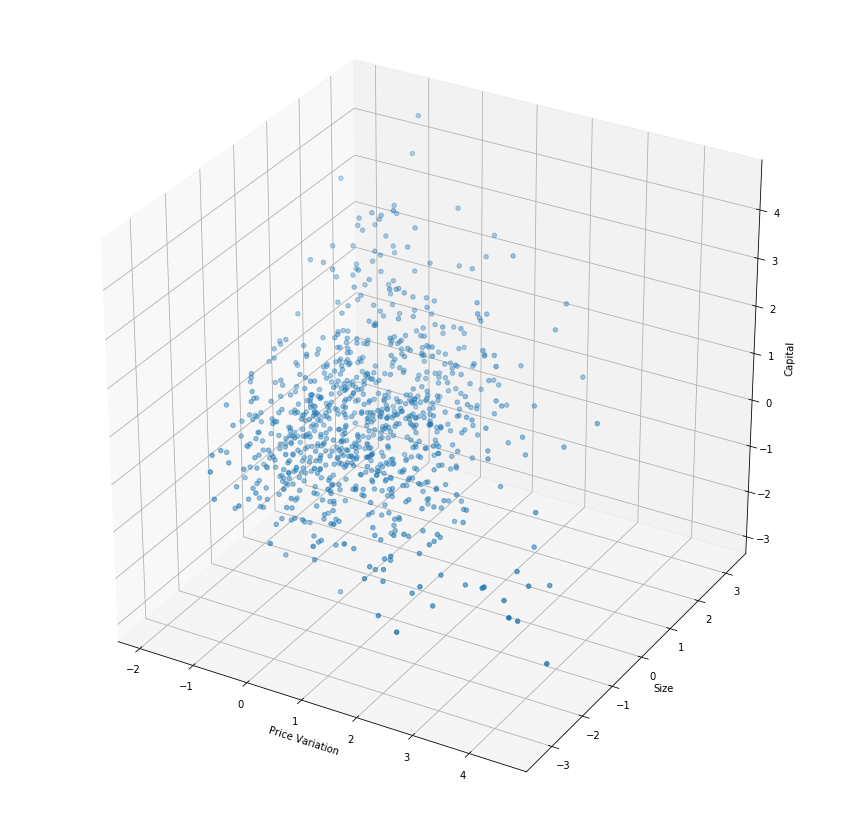

In [252]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.scatter3D(df_train['price_ATR'], df_train['total_mean'], df_train['capital'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Size')
ax.set_zlabel('Capital')

Text(0.5, 0, 'Capital')

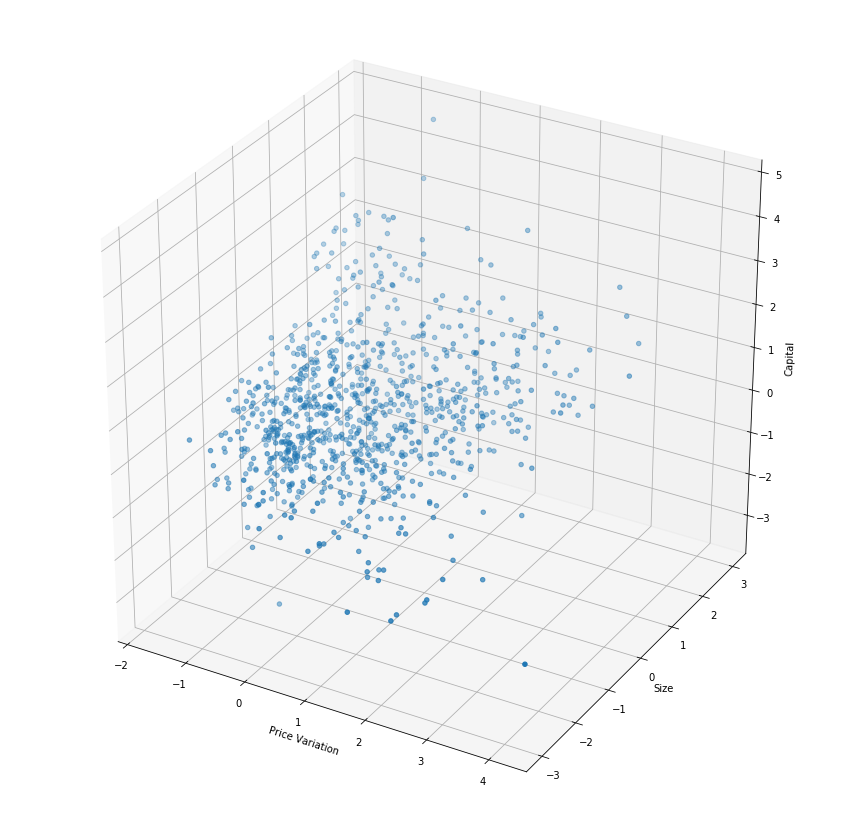

In [253]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.scatter3D(df_test['price_ATR'], df_test['total_mean'], df_test['capital'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Size')
ax.set_zlabel('Capital')

In [299]:
big_train = df_train[df_train['total_mean'] > df_train['total_mean'].quantile(0.4)]
small_train = df_train[df_train['total_mean'] <= df_train['total_mean'].quantile(0.4)]

In [300]:
clusters = [i for i in range(2, 31)]
Kmedians_Result, Kmedians_metrics, K_medians = func.Cluster(df_train, method='Kmedians', cluster_list=clusters)
Kmeans_Result, Kmeans_metrics, K_means = func.Cluster(df_train, method='Kmeans', cluster_list=clusters)
Kmedians_Result_big, Kmedians_metrics_big, K_medians_big = func.Cluster(big_train, method='Kmedians', cluster_list=clusters)
Kmeans_Result_big, Kmeans_metrics_big, K_means_big = func.Cluster(big_train, method='Kmeans', cluster_list=clusters)
Kmedians_Result_small, Kmedians_metrics_small, K_medians_small = func.Cluster(small_train, method='Kmedians', cluster_list=clusters)
Kmeans_Result_small, Kmeans_metrics_small, K_means_small = func.Cluster(small_train, method='Kmeans', cluster_list=clusters)

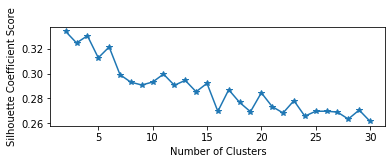

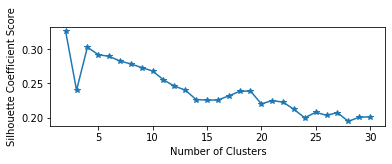

In [301]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(clusters, Kmeans_metrics, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 
plt.subplot(2,1,2)
plt.plot(clusters, Kmedians_metrics, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 

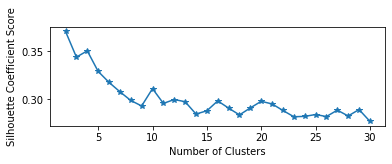

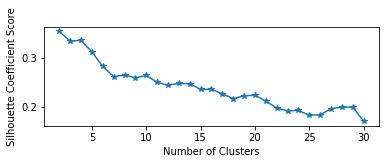

In [302]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(clusters, Kmeans_metrics_big, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 
plt.subplot(2,1,2)
plt.plot(clusters, Kmedians_metrics_big, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 

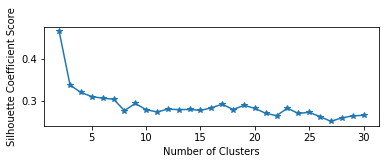

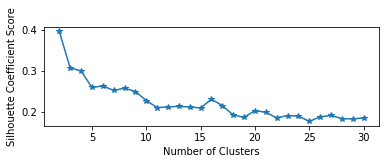

In [303]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(clusters, Kmeans_metrics_small, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 
plt.subplot(2,1,2)
plt.plot(clusters, Kmedians_metrics_small, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show() 

In [347]:
display(Kmedians_Result.groupby(Kmedians_Result['7']).size())
display(Kmedians_Result_big.groupby(Kmedians_Result_big['5']).size())
display(Kmedians_Result_small.groupby(Kmedians_Result_small['4']).size())
display(Kmeans_Result.groupby(Kmeans_Result['7']).size())
display(Kmeans_Result.groupby(Kmeans_Result_big['4']).size())
display(Kmeans_Result.groupby(Kmeans_Result_small['5']).size())

7
0    100
1    153
2     68
3    158
4    161
5    151
6     96
dtype: int64

5
0     73
1    109
2    128
3    138
4     84
dtype: int64

4
5    111
6    108
7     79
8     57
dtype: int64

7
0     68
1    139
2    114
3    168
4    184
5    174
6     40
dtype: int64

4
0.0    189
1.0     71
2.0    107
3.0    165
dtype: int64

5
0.0     16
1.0     74
2.0    105
3.0     99
4.0     61
dtype: int64

Text(0.5, 0, 'Capital')

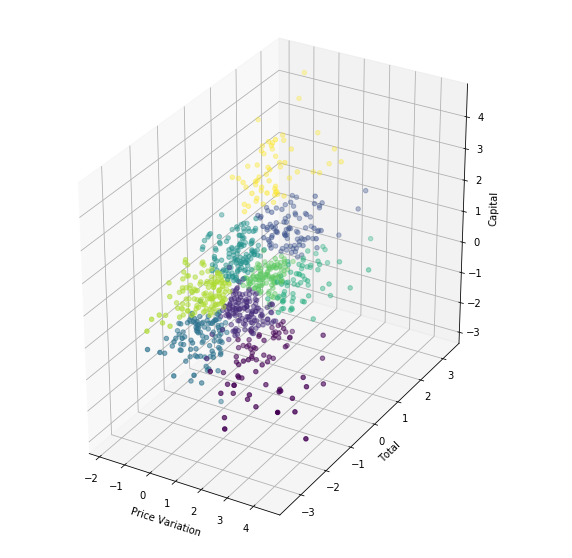

In [313]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(df_train['price_ATR'], df_train['total_mean'], df_train['capital'], c=Kmedians_Result['9'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

Text(0.5, 0, 'Capital')

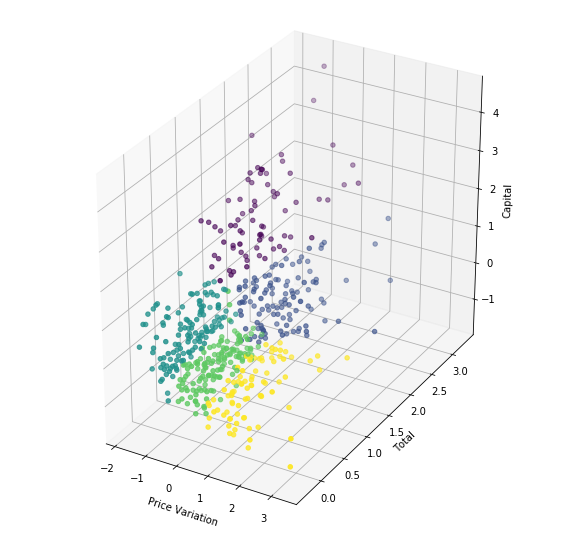

In [315]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(big_train['price_ATR'], big_train['total_mean'], big_train['capital'], c=Kmedians_Result_big['5'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

In [325]:
mean, std = func.ClusterStatistics(Kmedians_Result_big, big_train, 5)
display(mean)
display(std)

,total_mean,capital,price_ATR
Cluster0,1.624635,2.221205,-0.526486
Cluster1,1.212937,0.724204,0.793777
Cluster2,0.261261,0.521788,-0.766192
Cluster3,0.255294,-0.136887,0.124711
Cluster4,0.268398,-0.531709,1.232705


,total_mean,capital,price_ATR
Cluster0,0.526017,0.628805,0.625293
Cluster1,0.373850,0.438056,0.631551
Cluster2,0.300150,0.438453,0.371320
Cluster3,0.303462,0.361642,0.311285
Cluster4,0.346311,0.441012,0.558430


Text(0.5, 0, 'Capital')

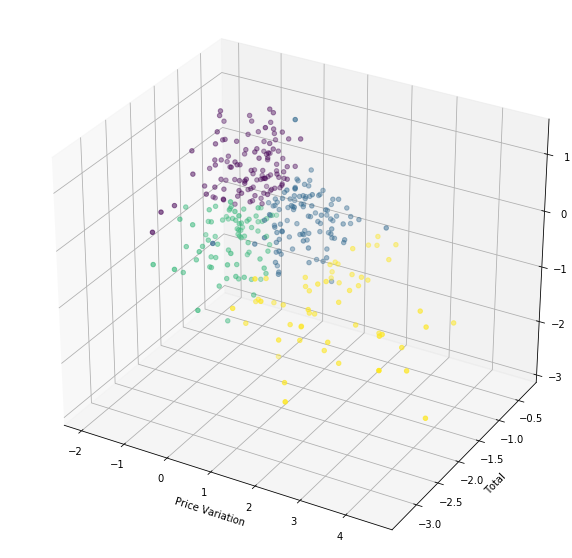

In [320]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 1, 1, 1]))
ax.scatter3D(small_train['price_ATR'], small_train['total_mean'], small_train['capital'], c=Kmedians_Result_small['4'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

In [326]:
mean_small, std_small = func.ClusterStatistics(Kmedians_Result_small, small_train, 4)
display(mean_small)
display(std_small)

,total_mean,capital,price_ATR
Cluster0,-0.695763,-0.056504,-1.078352
Cluster1,-0.667980,-0.757287,0.167955
Cluster2,-1.337077,-0.929755,-0.826277
Cluster3,-1.526760,-1.452835,1.685277


,total_mean,capital,price_ATR
Cluster0,0.356795,0.378138,0.412225
Cluster1,0.322619,0.383646,0.447507
Cluster2,0.426985,0.364413,0.381250
Cluster3,0.678275,0.380052,1.084414


In [330]:
print(Kmedians_Result_big[Kmedians_Result_big['5'] == 0].index.tolist())
print(Kmedians_Result_small[Kmedians_Result_small['4'] == 1].index.tolist())

['亞泥', '統一', '台泥', '佳格', '台塑', '南亞', '台化', '遠東新', '東元', '台肥', '中鋼', '正新', '裕隆', '和泰車', '裕日車', '光寶科', '聯電', '台達電', '鴻海', '仁寶', '台積電', '聯強', '宏碁', '鴻準', '英業達', '華碩', '廣達', '群光', '研華', '南亞科', '友達', '中華電', '聯發科', '可成', '宏達電', '興富發', '長榮', '台灣高鐵', '華航', '長榮航', '彰銀', '中壽', '華南金', '國泰金', '富邦金', '開發金', '玉山金', '元大金', '兆豐金', '台新金', '新光金', '永豐金', '中信金', '第一金', '統一超', '潤泰全', '大立光', '聯詠', '台灣大', '緯創', '群創', '亞太電', '大聯大', '遠傳', '和碩', '臻鼎-KY', '中租-KY', '合庫金', '力成', '台塑化', '寶成', '巨大', '潤泰新']
['福懋油', '興泰', '鮮活果汁-KY', '上曜', '永裕', '嘉裕', '大魯閣', '勤益控', '中和', '宏和', '聯發', '聚隆', '南緯', '首利', '正道', '華城', '日馳', '耿鼎', '恩德', '亞崴', '岱宇', '程泰', '華電', '億泰', '艾美特-KY', '三晃', '和康生', '中化生', '凱撒衛', '中釉', '高興昌', '燁興', '第一銅', '官田鋼', '聚亨', '華豐', '麗正', '光罩', '茂矽', '虹光', '映泰', '環科', '圓剛', '承啟', '三商電', '新美齊', '凌群', '建通', '良得電', '資通', '美隆電', '大毅', '連宇', '百容', '華建', '聯上發', '旺旺保', '客思達-KY', '鼎固-KY', '統領', '麗嬰房', '歐格', '豐達科', '今皓', '鴻名', '憶聲', '盛達', '全台', '遠見', '訊舟', '鈺德', '立萬利', '景岳', '同泰', '勝德', '昇貿', '柏騰', '聯穎', '通嘉', '力銘', '圓展'

In [336]:
centroid_list_big = []
for i in range(len(clusters)):
    centroid_list_big.append(K_medians_big[i].cluster_centers_)
    
centroid_list_small = []
for i in range(len(clusters)):
    centroid_list_small.append(K_medians_small[i].cluster_centers_)
    
display(centroid_list_big[3])
display(centroid_list_small[2])

array([[ 1.57176031,  2.11152918, -0.61106383],
       [ 1.18133227,  0.65631413,  0.69368211],
       [ 0.24247665,  0.56242499, -0.72510844],
       [ 0.24295649, -0.08893705,  0.13225938],
       [ 0.22131133, -0.50494156,  1.12990779]])

array([[-0.63282519, -0.09963589, -1.02535686],
       [-0.6243309 , -0.73913708,  0.07008785],
       [-1.27757841, -0.93708957, -0.81480646],
       [-1.52062237, -1.43533518,  1.47896102]])

In [339]:
big_test = df_test[df_test['total_mean'] > df_test['total_mean'].quantile(0.4)]
small_test = df_test[df_test['total_mean'] <= df_test['total_mean'].quantile(0.4)]

In [340]:
Stock = big_test.index.tolist()
output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.FindCluster, all_df=big_test, centroid=centroid_list_big[3]), Stock), total=len(Stock)), 1):
            output_list.append(x)
    
cluster_match_big = pd.DataFrame(np.stack(output_list, axis=0), columns=['StockName', 'cluster']).set_index('StockName')
cluster_match_big

,cluster
StockName,
聯華,2
佳格,2
台泥,0
味全,3
大成,2
...,...
好樂迪,2
潤泰新,2
佳龍,3


In [341]:
Stock = small_test.index.tolist()
output_list = []

if __name__ == '__main__':
    with Pool(processes=12) as pool:
        for i, x in enumerate(tqdm(pool.imap_unordered(partial(func.FindCluster, all_df=small_test, centroid=centroid_list_small[2]), Stock), total=len(Stock)), 1):
            output_list.append(x)
    
cluster_match_small = pd.DataFrame(np.stack(output_list, axis=0), columns=['StockName', 'cluster']).set_index('StockName')
cluster_match_small

,cluster
StockName,
愛之味,0
信大,1
環泥,0
聯華食,0
福壽,0
...,...
中聯資源,0
全國,0
欣高,2


In [342]:
print(cluster_match_big.groupby(cluster_match_big['cluster']).size())
print(cluster_match_small.groupby(cluster_match_small['cluster']).size())

cluster
0     65
1    131
2    143
3    128
4     96
dtype: int64
cluster
0    132
1     95
2    108
3     41
dtype: int64


Text(0.5, 0, 'Capital')

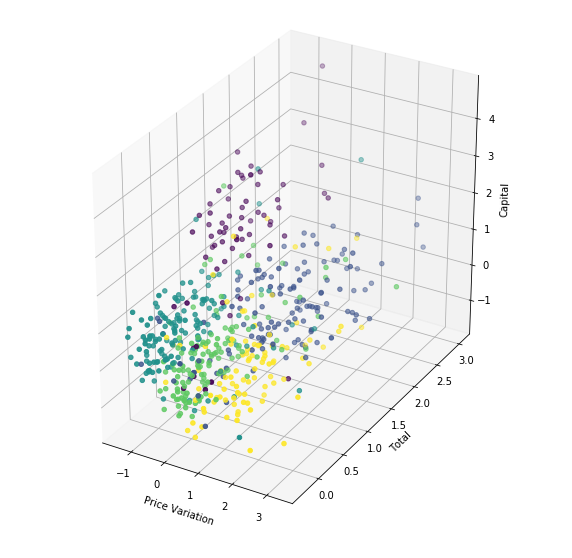

In [343]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(big_test['price_ATR'], big_test['total_mean'], big_test['capital'], c=cluster_match_big['cluster'].astype(int))
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

Text(0.5, 0, 'Capital')

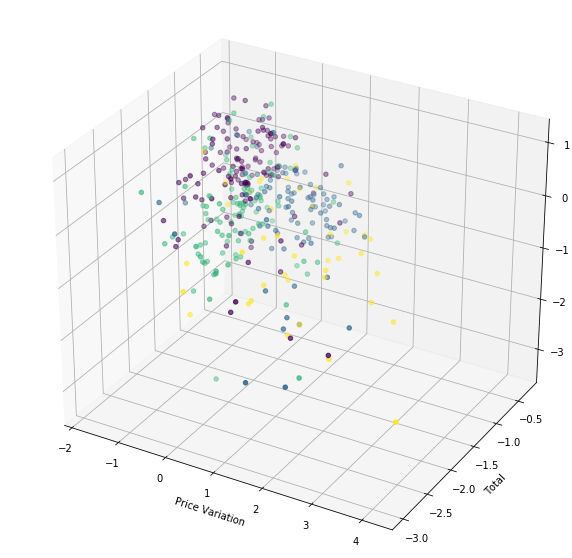

In [344]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.2, 1, 1, 1]))
ax.scatter3D(small_test['price_ATR'], small_test['total_mean'], small_test['capital'], c=cluster_match_small['cluster'].astype(int))
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

Text(0, 0.5, 'Capital')

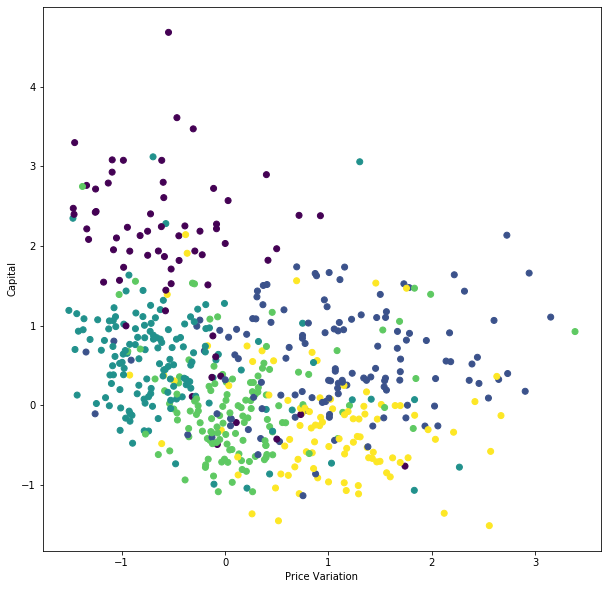

In [345]:
plt.figure(figsize=(10,10))
plt.scatter(big_test['price_ATR'], big_test['capital'], c=cluster_match_big['cluster'].astype(int))
plt.xlabel('Price Variation')
plt.ylabel('Capital')

In [351]:
Kmedians_Result_small['4'] = Kmedians_Result_small['4'] + 5
display(Kmedians_Result_small.groupby(Kmedians_Result_small['4']).size())
cluster_match_small['cluster'] = cluster_match_small['cluster'].astype(int) + 5
display(cluster_match_small.groupby(cluster_match_small['cluster']).size())

4
5    111
6    108
7     79
8     57
dtype: int64

cluster
5    132
6     95
7    108
8     41
dtype: int64

In [355]:
cluster_train = pd.DataFrame(pd.concat([Kmedians_Result_big['5'], Kmedians_Result_small['4']], axis=0), columns=['cluster'])
cluster_test = pd.DataFrame(pd.concat([cluster_match_big['cluster'].astype(int), cluster_match_small['cluster']], axis=0), columns=['cluster'])
display(cluster_train)
display(cluster_test)

,cluster
亞泥,0
味全,2
卜蜂,3
統一,0
台泥,0
...,...
佳龍,6
新麗,6
信義,5
茂順,5


,cluster
StockName,
聯華,2
佳格,2
台泥,0
味全,3
大成,2
...,...
中聯資源,5
全國,5
欣高,7


In [356]:
display(cluster_train.groupby(cluster_train['cluster']).size())
display(cluster_test.groupby(cluster_test['cluster']).size())

cluster
0     73
1    109
2    128
3    138
4     84
5    111
6    108
7     79
8     57
dtype: int64

cluster
0     65
1    131
2    143
3    128
4     96
5    132
6     95
7    108
8     41
dtype: int64

In [358]:
data_train['cluster'] = cluster_train['cluster']
data_test['cluster'] = cluster_test['cluster']
display(data_train)
display(data_test)

,total_mean,price_ATR,capital,cluster
信大,1.090087e+06,0.012487,4.350600e+09,7
味王,3.353934e+06,0.013241,5.428082e+09,5
嘉泥,7.180519e+06,0.017038,9.929070e+09,5
亞泥,1.305098e+08,0.017656,1.090585e+11,0
味全,4.412635e+07,0.021098,1.527618e+10,2
...,...,...,...,...
新麗,8.960521e+06,0.028727,2.751558e+09,6
好樂迪,2.022509e+07,0.016900,6.431492e+09,2
信義,1.305847e+07,0.016879,2.099488e+10,5
茂順,1.167223e+07,0.018751,6.054425e+09,5


,total_mean,price_ATR,capital,cluster
信大,6.225619e+06,0.023681,5.057098e+09,6
味全,5.082106e+07,0.022709,1.173728e+10,3
台泥,6.269415e+08,0.018001,1.923319e+11,0
環泥,5.693180e+06,0.009317,1.370893e+10,5
亞泥,2.954602e+08,0.020892,1.169718e+11,0
...,...,...,...,...
潤泰新,1.053182e+08,0.016481,4.365541e+10,2
佳龍,1.549676e+07,0.026649,1.487849e+09,3
新麗,1.498202e+06,0.014931,1.946393e+09,7
三發地產,1.279441e+07,0.023976,4.201120e+09,3


In [357]:
savelist = [centroid_list_big, centroid_list_small]
with open(f'D:\\庫存健診開發\\data\\Clustering\\Cluster_centroid', 'wb') as fp:
    pickle.dump(savelist, fp)

In [362]:
Kmedians_Result_big.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmedians_feature_big.csv', index=True)
Kmedians_Result_small.to_csv('D:\\庫存健診開發\\data\\Clustering\\Cluster_data_Kmedians_feature_small.csv', index=True)

In [359]:
data_train.to_csv('D:\\庫存健診開發\\data\\Clustering\\train_cluster.csv')
data_test.to_csv('D:\\庫存健診開發\\data\\Clustering\\test_cluster.csv')

In [360]:
with open('D:\\庫存健診開發\\data\\Clustering\\Cluster_centroid', 'rb') as fp:
    load_list = pickle.load(fp)

In [7]:
d = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\train_cluster.csv', index_col=0)
d_test = pd.read_csv('D:\\庫存健診開發\\data\\Clustering\\test_cluster.csv', index_col=0)

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Capital')

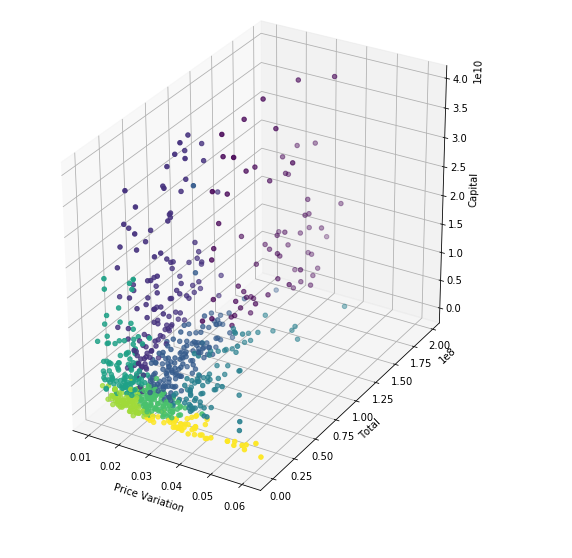

In [6]:
d1 = d[d['capital'] < d['capital'].quantile(0.9)][d['total_mean'] < d['total_mean'].quantile(0.9)]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(d1['price_ATR'], d1['total_mean'], d1['capital'], c=d1['cluster'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

C:\Users\011553\AppData\Local\Continuum\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'Capital')

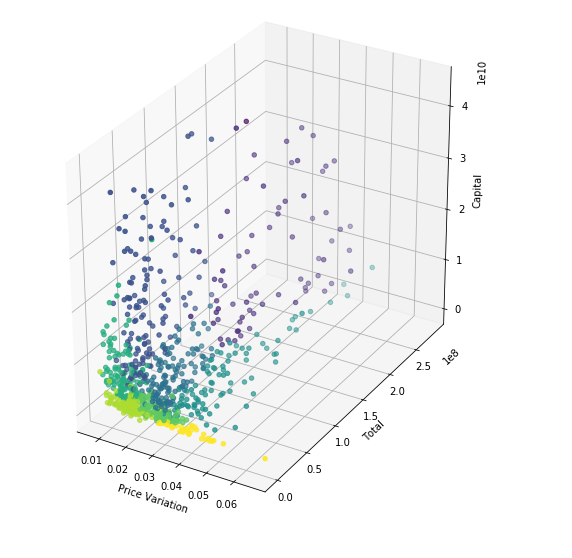

In [8]:
d2 = d_test[d_test['capital'] < d_test['capital'].quantile(0.9)][d_test['total_mean'] < d_test['total_mean'].quantile(0.9)]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 1.2, 1, 1]))
ax.scatter3D(d2['price_ATR'], d2['total_mean'], d2['capital'], c=d2['cluster'])
ax.set_xlabel('Price Variation')
ax.set_ylabel('Total')
ax.set_zlabel('Capital')

In [7]:
import numpy as np
x = np.array([[1,1], [2,2], [1,3], [4,2]])
y = np.array([[1,1], [2,2], [1,3], [4,2]])

In [13]:
sum([x,y])/2

array([[1., 1.],
       [2., 2.],
       [1., 3.],
       [4., 2.]])